In [1]:
import pickle
import random

import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import binom, norm
from confidence_interval import ci_mean, ci_prop

## Question 0

## Working with missing data

### Detecting
- use `.isnull()` to detecte missing values
- use `.notnull()` to detecte non-null values

### Example

In [2]:
df = pd.DataFrame(
    [[1, np.nan, 3], [np.nan, 5, 6], [7, 8, np.nan], [10, 11, 12]], 
    index=["a", "b", "c", "d"], 
    columns=["0", "1", "2"]
)
df

,0,1,2
a,1.0,NaN,3.0
b,NaN,5.0,6.0
c,7.0,8.0,NaN
d,10.0,11.0,12.0


In [3]:
df.isnull()

,0,1,2
a,False,True,False
b,True,False,False
c,False,False,True
d,False,False,False


### Deleting
- use `.dropna()` to delete the missing values

### Example

In [4]:
df.dropna()

,0,1,2
d,10.0,11.0,12.0


### Filling
- use `.fillna()` to fill the missing values
- use `.ffill()` to fill the missing value with forward one
- use `.bfill()` to fill the missing value with backward one


### Example

In [5]:
df.fillna(100)

,0,1,2
a,1.0,100.0,3.0
b,100.0,5.0,6.0
c,7.0,8.0,100.0
d,10.0,11.0,12.0


## Question 1

### part a)

In [6]:
def gender_values(x):
    """
    This function changes a appropriate format for column.

    Parameters
    ----------
    x : dataframe
        the column needs to be change.

    Returns
    -------
    the changed column.

    """
    if x["gender"] == 1:
        return "Male"
    elif x["gender"] == 2:
        return "Female"
    else:
        return np.nan

In [7]:
# reading data
df_demo = pickle.load(open("DEMO.pkl", "rb"))
df_demo["gender"] = df_demo.apply(lambda x: gender_values(x), axis=1)

# present the dataframe
df_demo

,id,gender,age,race,education,marriage,exam_status,weight2,weight3,weight4,weight5,year
1,62161.0,Male,22.0,3.0,3.0,5.0,2.0,1.0,91.0,104236.582554,102641.406474,2011-2012
2,62162.0,Female,3.0,1.0,NaN,NaN,2.0,3.0,92.0,16116.354010,15457.736897,2011-2012
3,62163.0,Male,14.0,6.0,NaN,NaN,2.0,3.0,90.0,7869.485117,7397.684828,2011-2012
4,62164.0,Female,44.0,3.0,4.0,1.0,2.0,1.0,94.0,127965.226204,127351.373299,2011-2012
5,62165.0,Female,14.0,4.0,NaN,NaN,2.0,2.0,90.0,13384.042162,12209.744980,2011-2012
...,...,...,...,...,...,...,...,...,...,...,...,...
39152,102952.0,Female,70.0,6.0,3.0,1.0,2.0,2.0,138.0,18338.711104,16896.276203,2017-2018
39153,102953.0,Male,42.0,1.0,3.0,4.0,2.0,2.0,137.0,63661.951573,61630.380013,2017-2018
39154,102954.0,Female,41.0,4.0,5.0,5.0,2.0,1.0,144.0,17694.783346,17160.895269,2017-2018
39155,102955.0,Female,14.0,4.0,NaN,NaN,2.0,1.0,136.0,14871.839636,14238.445922,2017-2018


### part b)

In [8]:
def college_values(x):
    """
    This function generate a categorical variable.

    Parameters
    ----------
    x : dataframe

    Returns
    -------
    the categorical variable.

    """
    if x["education"] == 4 or x["education"] == 5: 
        return "some college/college graduate"
    elif x["education"] >= 1 and x["education"] <= 3:
        return "No college/<20"
    elif x["under_20"] == "True": 
        return "No college/<20"
    else: 
        return "No college/<20"
    
def ohx_values(x):
    """
    This function generate a categorical variable.

    Parameters
    ----------
    x : dataframe

    Returns
    -------
    the categorical variable.

    """
    if x["exam_status"] == 2 and x["ohx_status"] == 1:
        return "complete"
    else:
        return "missing"

In [9]:
# reading data
df_ohxden = pickle.load(open("OHXDEN.pkl", "rb"))
df_raw = pd.merge(df_demo, df_ohxden[["id", "ohx_status"]], how="outer", on=["id"])
    
# create a categorical variable    
df_raw["under_20"] = df_raw["age"].apply(lambda x: "True" if x < 20 else "False")
df_raw["college"] = df_raw.apply(lambda x: college_values(x), axis=1)
df_raw["ohx"] = df_raw.apply(lambda x: ohx_values(x), axis=1)

# present the dataframe
df_raw = df_raw[["id", "gender", "age", "under_20", "college", "exam_status", 
            "ohx_status", "ohx"]]
df_raw

,id,gender,age,under_20,college,exam_status,ohx_status,ohx
0,62161.0,Male,22.0,False,No college/<20,2.0,1.0,complete
1,62162.0,Female,3.0,True,No college/<20,2.0,1.0,complete
2,62163.0,Male,14.0,True,No college/<20,2.0,1.0,complete
3,62164.0,Female,44.0,False,some college/college graduate,2.0,1.0,complete
4,62165.0,Female,14.0,True,No college/<20,2.0,1.0,complete
...,...,...,...,...,...,...,...,...
39151,102952.0,Female,70.0,False,No college/<20,2.0,1.0,complete
39152,102953.0,Male,42.0,False,No college/<20,2.0,1.0,complete
39153,102954.0,Female,41.0,False,some college/college graduate,2.0,1.0,complete
39154,102955.0,Female,14.0,True,No college/<20,2.0,1.0,complete


### part c)

In [10]:
# remove rows
df = df_raw.drop(df_raw[df_raw["exam_status"] != 2].index)

In [11]:
# the number of subjects removed 
df_raw[df_raw["exam_status"] != 2].shape[0]

1757

In [12]:
# the number of subjects remaining 
df.shape[0]

37399

### part d)

In [13]:
def count_category_str(df, df_complete, df_missing, names):
    """
    This function count the number of categorical variable.

    Parameters
    ----------
    df : dataframe needs calculation.
    df_complete : dataframe with ohx complete.
    df_missing : dataframe with ohx missing.
    names : index.

    Returns
    -------
    dataframe with the str format.

    """
    count_c = {}
    for value in df_complete[names].unique():
        num_c = df_complete[df_complete[names] == value].shape[0]
        sum_c = df[df[names] == value].shape[0]
        count_c[value] = str(num_c) + " (" + str(format(num_c / sum_c * 100, '.2f')) + "%)"
        
    count_m = {}
    for value in df_missing[names].unique():
        num_m = df_missing[df_missing[names] == value].shape[0]
        sum_m = df[df[names] == value].shape[0]
        count_m[value] = str(num_m) + " (" + str(format(num_m / sum_m * 100, '.2f')) + "%)"
    return pd.DataFrame({"complete": count_c, "missing": count_m})


def count_category_num(df, df_complete, df_missing, names):
    """
    This function count the number of categorical variable.

    Parameters
    ----------
    df : dataframe needs calculation.
    df_complete : dataframe with ohx complete.
    df_missing : dataframe with ohx missing.
    names : index.

    Returns
    -------
    dataframe with the numerical format.

    """
    count_c = {}
    for value in df_complete[names].unique():
        num_c = df_complete[df_complete[names] == value].shape[0]
        count_c[value] = num_c
        
    count_m = {}
    for value in df_missing[names].unique():
        num_m = df_missing[df_missing[names] == value].shape[0]
        count_m[value] = num_m
    return pd.DataFrame({"complete": count_c, "missing": count_m})


def calculate_category(df, df_complete, df_missing, names):
    """
    This function calculate the mean and standard deviation.

    Parameters
    ----------
    df : dataframe needs calculation.
    df_complete : dataframe with ohx complete.
    df_missing : dataframe with ohx missing.
    names : index.

    Returns
    -------
    dataframe with the str format.

    """
    mean_c = np.mean(df_complete[names])
    mean_m = np.mean(df_missing[names])
    std_c = np.std(df_complete[names])
    std_m = np.std(df_missing[names])
    str_c = str(format(mean_c, '.0f')) + " (" + str(format(std_c, ".2f")) + ")"
    str_m = str(format(mean_m, '.0f')) + " (" + str(format(std_m, ".2f")) + ")"
    return pd.DataFrame({"complete": {"age": str_c}, "missing": {"age": str_m}})

In [14]:
df_complete = df[df["ohx"] == "complete"]
df_missing = df[df["ohx"] == "missing"]

# calculate the number or mean of each variable
df_under_20_str = count_category_str(df, df_complete, df_missing, "under_20")
df_gender_str = count_category_str(df, df_complete, df_missing, "gender")
df_college_str = count_category_str(df, df_complete, df_missing, "college")
df_age_str = calculate_category(df, df_complete, df_missing, "age")

df_under_20_num = count_category_num(df, df_complete, df_missing, "under_20")
df_gender_num = count_category_num(df, df_complete, df_missing, "gender")
df_college_num = count_category_num(df, df_complete, df_missing, "college")

# calculate the p-value
p_value_under_20 = chi2_contingency(df_under_20_num)[1]
p_value_gender = chi2_contingency(df_gender_num)[1]
p_value_college = chi2_contingency(df_college_num)[1]
p_value_age = stats.ttest_ind(df_complete["age"], df_missing["age"], 
                              equal_var=False)[1]

df_under_20_str["p_value"] = [str(p_value_under_20), " "]
df_gender_str["p_value"] = [str(p_value_gender), " "]
df_college_str["p_value"] = [str(p_value_college), " "]
df_age_str["p_value"] = str(p_value_age)

In [15]:
# present the dataframe
df_dict = {"under_20": df_under_20_str,
          "gender": df_gender_str,
          "college": df_college_str,
          "age": df_age_str}
pd.concat(df_dict)

complete        missing  \
under_20 False                          20369 (94.10%)   1277 (5.90%)   
         True                           13991 (88.81%)  1762 (11.19%)   
gender   Male                           17018 (92.33%)   1413 (7.67%)   
         Female                         17342 (91.43%)   1626 (8.57%)   
college  No college/<20                 22974 (90.45%)   2427 (9.55%)   
         some college/college graduate  11386 (94.90%)    612 (5.10%)   
age      age                                33 (24.37)     22 (26.58)   

                                                        p_value  
under_20 False                            4.959900703450187e-76  
         True                                                    
gender   Male                             0.0014393925074984973  
         Female                                                  
college  No college/<20                   6.977149856782092e-49  
         some college/college graduate                           
age      age                            2.4530204182987264e-103

## Question 2

### part a) 

In [16]:
def Monte_Carlo_CI(n, p, level, method, rep):
    """
    This function calculate the actual confidence level with Monte Carlo experiment.

    Parameters
    ----------
    n : sample size.
    p : population proportion.
    level : nominal confidence level.
    method : the method used to construce binomial confidence intervals.
    rep : repeat times

    Returns
    -------
    float,the actual confidence level.

    """
    z = 0
    for k in range(rep):
        x = binom.rvs(1, p, size=n)
        
        if method == "mean":
            est_dict = ci_mean(x, level)
        elif method == "Normal":
            est_dict = ci_prop(x, level, "Normal")
        elif method == "CP":
            est_dict = ci_prop(x, level, "CP")
        elif method == "AC":
            est_dict = ci_prop(x, level, "AC")
        elif method == "Jeffrey":
            est_dict = ci_prop(x, level, "Jeffrey")
            
        if p >= est_dict["lwr"] and p <= est_dict["upr"]:
            z += 1
    return format(z/rep, ".4f")

In [17]:
random.seed(1234)
level = 0.95
rep = 1000
n = np.arange(60, 120, 10)
p = np.arange(.5, .75, .05)

z_mean = np.zeros((len(n), len(p)))
z_CP = np.zeros((len(n), len(p)))
z_AC = np.zeros((len(n), len(p)))
z_normal = np.zeros((len(n), len(p)))
z_jeffrey = np.zeros((len(n), len(p)))

for i in range(len(n)):
    for j in range(len(p)):
        z_CP[i, j] = Monte_Carlo_CI(n[i], p[j], level, "CP", rep)
        z_AC[i, j] = Monte_Carlo_CI(n[i], p[j], level, "AC", rep)
        z_mean[i, j] = Monte_Carlo_CI(n[i], p[j], level, "mean", rep)
        z_normal[i, j] = Monte_Carlo_CI(n[i], p[j], level, "Normal", rep)
        z_jeffrey[i, j] = Monte_Carlo_CI(n[i], p[j], level, "Jeffrey", rep)       

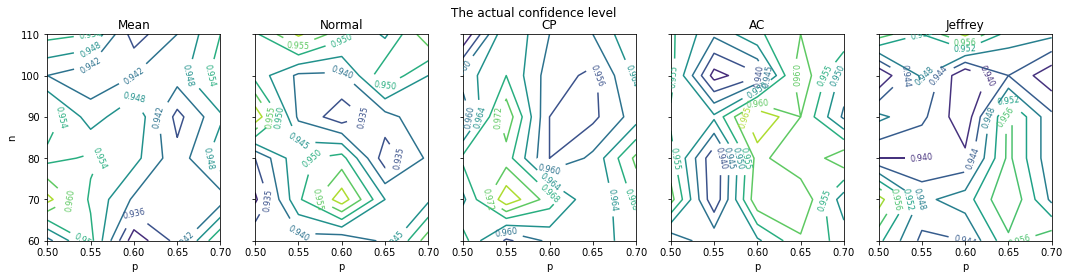

In [18]:
# plot
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(18, 3.8), sharey=True)
x1 = ax1.contour(p, n, z_mean)
ax1.set_title("Mean")
ax1.set_ylabel("n")
ax1.set_xlabel("p")
ax1.clabel(x1, inline=True, fontsize=8)


x2 = ax2.contour(p, n, z_normal)
ax2.set_title("Normal")
ax2.set_xlabel("p")
ax2.clabel(x2, inline=True, fontsize=8)

x3 = ax3.contour(p, n, z_CP)
ax3.set_title("CP")
ax3.set_xlabel("p")
ax3.clabel(x3, inline=True, fontsize=8)

x4 = ax4.contour(p, n, z_AC)
ax4.set_title("AC")
ax4.set_xlabel("p")
ax4.clabel(x4, inline=True, fontsize=8)

x5 = ax5.contour(p, n, z_jeffrey)
ax5.set_title("Jeffrey")
ax5.set_xlabel("p")
ax5.clabel(x5, inline=True, fontsize=8)

fig.suptitle("The actual confidence level")
plt.show()

### part b) 

In [19]:
def Monte_Carlo_Length(n, p, level, method, rep):
    """
    This function calculate length of the actual confidence level with Monte 
    Carlo experiment.

    Parameters
    ----------
    n : sample size.
    p : population proportion.
    level : nominal confidence level.
    method : the method used to construce binomial confidence intervals.
    rep : repeat times

    Returns
    -------
    float, the length of the actual confidence level.

    """
    sum_l = 0
    for k in range(rep):
        x = binom.rvs(1, p, size=n)
        
        if method == "mean":
            est_dict = ci_mean(x, level)
        elif method == "Normal":
            est_dict = ci_prop(x, level, "Normal")
        elif method == "CP":
            est_dict = ci_prop(x, level, "CP")
        elif method == "AC":
            est_dict = ci_prop(x, level, "AC")
        elif method == "Jeffrey":
            est_dict = ci_prop(x, level, "Jeffrey")
        
        sum_l += est_dict["upr"] - est_dict["lwr"]
    return format(sum_l/rep, ".4f")

In [20]:
random.seed(1234)
level = 0.95
rep = 1000
n = np.arange(60, 120, 10)
p = np.arange(.5, .75, .05)

z_mean = np.zeros((len(n), len(p)))
z_CP = np.zeros((len(n), len(p)))
z_AC = np.zeros((len(n), len(p)))
z_normal = np.zeros((len(n), len(p)))
z_jeffrey = np.zeros((len(n), len(p)))

for i in range(len(n)):
    for j in range(len(p)):
        z_CP[i, j] = Monte_Carlo_Length(n[i], p[j], level, "CP", rep)
        z_AC[i, j] = Monte_Carlo_Length(n[i], p[j], level, "AC", rep)
        z_mean[i, j] = Monte_Carlo_Length(n[i], p[j], level, "mean", rep)
        z_normal[i, j] = Monte_Carlo_Length(n[i], p[j], level, "Normal", rep)
        z_jeffrey[i, j] = Monte_Carlo_Length(n[i], p[j], level, "Jeffrey", rep)       

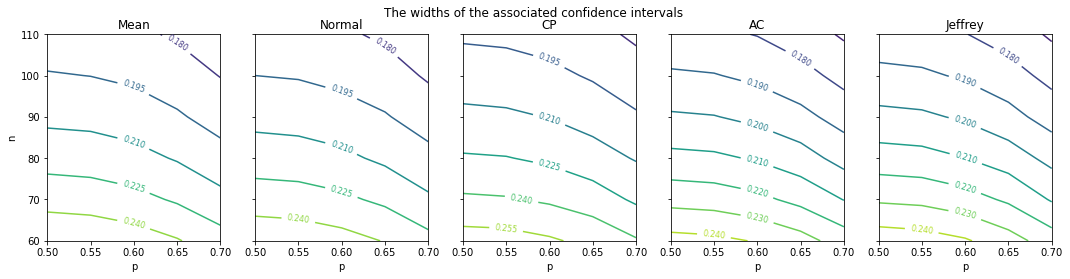

In [21]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(18, 3.8), sharey=True)
x1 = ax1.contour(p, n, z_mean)
ax1.set_title("Mean")
ax1.set_ylabel("n")
ax1.set_xlabel("p")
ax1.clabel(x1, inline=True, fontsize=8)

x2 = ax2.contour(p, n, z_normal)
ax2.set_title("Normal")
ax2.set_xlabel("p")
ax2.clabel(x2, inline=True, fontsize=8)

x3 = ax3.contour(p, n, z_CP)
ax3.set_title("CP")
ax3.set_xlabel("p")
ax3.clabel(x3, inline=True, fontsize=8)

x4 = ax4.contour(p, n, z_AC)
ax4.set_title("AC")
ax4.set_xlabel("p")
ax4.clabel(x4, inline=True, fontsize=8)

x5 = ax5.contour(p, n, z_jeffrey)
ax5.set_title("Jeffrey")
ax5.set_xlabel("p")
ax5.clabel(x5, inline=True, fontsize=8)

fig.suptitle("The widths of the associated confidence intervals")
plt.show()

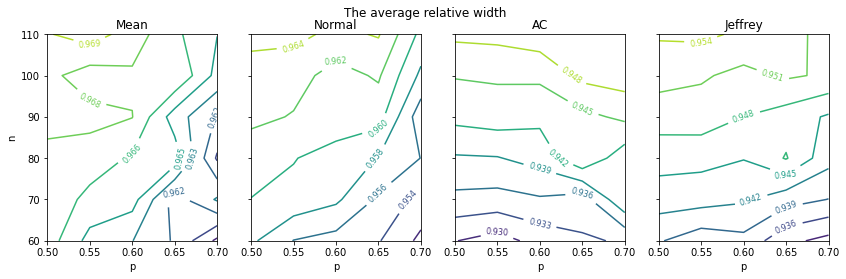

In [22]:
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1, 4, figsize=(14, 3.8), sharey=True)
x1 = ax1.contour(p, n, z_mean / z_CP)
ax1.set_title("Mean")
ax1.set_ylabel("n")
ax1.set_xlabel("p")
ax1.clabel(x1, inline=True, fontsize=8)

x2 = ax2.contour(p, n, z_normal / z_CP)
ax2.set_title("Normal")
ax2.set_xlabel("p")
ax2.clabel(x2, inline=True, fontsize=8)

x4 = ax4.contour(p, n, z_AC / z_CP)
ax4.set_title("AC")
ax4.set_xlabel("p")
ax4.clabel(x4, inline=True, fontsize=8)

x5 = ax5.contour(p, n, z_jeffrey / z_CP)
ax5.set_title("Jeffrey")
ax5.set_xlabel("p")
ax5.clabel(x5, inline=True, fontsize=8)

fig.suptitle("The average relative width")
plt.show()